In [18]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [19]:
cwd = os.path.join(os.getcwd(), 'Group Coursework Brief-20221106', 'Data_Files', 'Data_Files')
dirName_trainData = os.path.join(cwd, 'epl-training.csv')

In [20]:
df_epl_train = pd.read_csv(dirName_trainData)

In [21]:
df_epl_train.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [22]:
# Transform the date column from strings into datetime objects
df_epl_train["Date"] = pd.to_datetime(df_epl_train["Date"], dayfirst=True)

In [23]:
df_epl_train.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


AIM: A function that takes as input the date, HomeTeam and AwayTeam. It will filter the df_epl_train dataframe for matches between HomeTeam and AwayTeam that took place before the input date. Then take an average of the 
columns like HR, AR, etc. This will provide us with the past stats for games played in past between the two teams. We can then use these past stats (between the two teams) as features to input into the classifier.

First, filter the dataframe to include only matches where date is less than date specified and also only include matches where HomeTeam=input(HomeTeam) and AwayTeam=input(AwayTeam):

In [24]:
# This function will take as input a date, HomeTeam and AwayTeam and output a filtered dataframe where the matches shown are played before input data and match is between HomeTeam and AwayTeam

# For Example:
# date = "24/06/2020"
# HomeTeam = "Newcastle"
# AwayTeam = "Aston Villa"

def filter_dataframe(date, HomeTeam, AwayTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Date<input(Date) && HomeTeam=input(HomeTeam) && AwayTeam=input(AwayTeam)
    df_epl_train_filtered = df_epl_train.copy()
    df_epl_train_filtered = df_epl_train_filtered[(df_epl_train.Date<date) & (df_epl_train.HomeTeam==HomeTeam) & (df_epl_train.AwayTeam==AwayTeam)]

    # Return filtered dataframe
    return df_epl_train_filtered

# An example to see what the function does:
print(filter_dataframe("24/06/2020", "Newcastle", "Aston Villa"))

           Date   HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
377  2001-05-19  Newcastle  Aston Villa   3.0   0.0   H   2.0   0.0   H   
486  2001-11-03  Newcastle  Aston Villa   3.0   0.0   H   1.0   0.0   H   
1105 2003-04-21  Newcastle  Aston Villa   1.0   1.0   D   1.0   0.0   H   
1244 2003-11-01  Newcastle  Aston Villa   1.0   1.0   D   1.0   1.0   D   
1825 2005-04-02  Newcastle  Aston Villa   0.0   3.0   A   0.0   1.0   A   
2041 2005-12-03  Newcastle  Aston Villa   1.0   1.0   D   1.0   0.0   H   
2526 2007-01-31  Newcastle  Aston Villa   3.0   1.0   H   2.0   1.0   H   
2679 2007-08-18  Newcastle  Aston Villa   0.0   0.0   D   0.0   0.0   D   
3148 2008-11-03  Newcastle  Aston Villa   2.0   0.0   H   0.0   0.0   D   
3818 2010-08-22  Newcastle  Aston Villa   6.0   0.0   H   3.0   0.0   H   
4418 2012-02-05  Newcastle  Aston Villa   2.0   1.0   H   1.0   1.0   D   
4587 2012-09-02  Newcastle  Aston Villa   1.0   1.0   D   0.0   1.0   A   
5206 2014-02-23  Newcastl

We now find the average of each of the columns that we need from this filtered dataframe e.g. HST, AST:

In [31]:
# This function takes as input the filtered dataframe from previous cell, features to average and a dictionary,
# it then appends an average of each feature to the dictionary

# Given a filtered dataframe for some Home and Away teams and date; find years where previous matches were played
def find_years(df_epl_train_filtered):
    years = []
    for index, row in df_epl_train_filtered.iterrows():
        y = row["Date"].year
        if y not in years:
            years.append(y)
    return years

# Generate weights for each year given an array of years - more recent years get a higher weight
def generate_weights(years):
    num_years = len(years)
    weights = []
    for y in years:
        weights.append(sigmoid(y))
    return weights

def sigmoid(year):
    x = year / 10000
    return 1.0 / (1.0 + np.exp(-x))


# Get an average for each feature using the weights generated on some given filtered dataframe
def avg_using_weights(features, avg_features, filtered_df, years, weights):
    num_of_items_in_col = filtered_df["Date"].count()
    if num_of_items_in_col != 0:
        weight_dict = {years[i]: weights[i]for i in range(len(years))}
        for feature in features:
            feature_sum = 0
            for index, row in filtered_df.iterrows():
                year = row["Date"].year
                feature_val = row[feature]
                weight_for_year = weight_dict[year]
                feature_sum = feature_sum + (weight_for_year*feature_val)
            feature_avg = feature_sum/num_of_items_in_col
            avg_features[feature].append(feature_avg)
    else:
        for feature in features:
            avg_features[feature].append(np.NaN)
        
# Given a filtered dataframe, average the relevent features columns, and add the averages into avg_features dictionary
def avg_columns_with_weights(features, avg_features, df_epl_train_filtered):
    years = find_years(df_epl_train_filtered)
    weights = generate_weights(years)
    print(years, weights)
    avg_using_weights(features, avg_features, df_epl_train_filtered, years, weights)


# OLD AVERAGE FUNCTIOON
# def average_columns(features, avg_features, filtered_df):
#     for feature in features:
#         df_col_means = df_epl_train_filtered[feature].mean()
#         avg_features[feature].append(df_col_means)

We now run the two functions on each row of the original dataframe to fill the dictionary with averages for each row

In [32]:
# Run the two functions for each row of our df_epl_train dataframe to fill dictionary with AVG for each match
# NOTE: Some matches won't have past stats since the two teams may not have played against each other in past or we might not have the data

# These are the features we want to get averages for
features = ["FTHG","FTAG","HTHG","HTAG","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR"]
avg_features = {
                    "FTHG": [],
                    "FTAG": [],
                    "HTHG": [],
                    "HTAG": [],
                    "HS"  : [],
                    "AS"  : [],
                    "HST" : [],
                    "AST" : [],
                    "HF"  : [],
                    "AF"  : [],
                    "HC"  : [],
                    "AC"  : [],
                    "HY"  : [],
                    "AY"  : [],
                    "HR"  : [],
                    "AR"  : []
                }

# Run the two functions on each row of the df_epl_train and fill the dictionary
# For each row in the dataframe
for index, row in df_epl_train.iterrows():
    # Filter the dataframe to only show matches played between those teams and before the certain date
    df_epl_train_filtered = filter_dataframe(row["Date"],row["HomeTeam"],row["AwayTeam"])
    # Get averages from the filtered dataframe and add to the avg_features dictionary
    print('Enter')
    avg_columns_with_weights(features, avg_features, df_epl_train_filtered)
    # NOTE THIS BELOW IS THE OLD AVERAGE FUNCTION
    # average_columns(features, avg_features, df_epl_train_filtered)

Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[] []
Ente

Enter
[2000] [0.549833997312478]
Enter
[2000] [0.549833997312478]
Enter
[2000] [0.549833997312478]
Enter
[] []
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[2000] [0.549833997312478]
Enter
[2000] [0.549833997312478]
Enter
[] []
Enter
[] []
Enter
[2000] [0.549833997312478]
Enter
[2001] [0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[2000] [0.549833997312478]
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[2000] [0.549833997312478]
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[] []
Enter
[2000] [0.549833997312478]
Enter
[2001] [0.5498587488463816]
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[] []
Enter
[2000] [0.549833997312478]
Enter
[2000] [0.549833997312478]
Enter
[2001] [0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[2000] [0.549833997312478]
Enter
[2000] [0.549833997312478]
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[2000] [0.549833997312478]
Enter
[2000] [0.549833997312478]
Enter
[2000

Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2001] [0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2002] [0.5498835001334705]
Enter
[] []
Enter
[] []
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[] []
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[] []
Enter
[2000, 2001] [0.549833997312478, 0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[2000] [0.549833997312478]
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2001] [0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[2002] [0.5498835001334705]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[20

Enter
[2001] [0.5498587488463816]
Enter
[2000, 2001] [0.549833997312478, 0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[] []
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[2000, 2001] [0.549833997312478, 0.5498587488463816]
Enter
[] []
Enter
[2001] [0.5498587488463816]
Enter
[2000, 2001] [0.549833997312478, 0.5498587488463816]
Enter
[] []
Enter
[2000, 2001] [0.549833997312478, 0.5498587488463816]
Enter
[2000, 2001] [0.549833997312478, 0.5498587488463816]
Enter
[2002] [0.5498835001334705]
Enter
[2000, 2001] [0.549833997312478, 0.5498587488463816]
Enter
[2002] [0.5498835001334705]
Enter
[2001] [0.5498587488463816]
Enter
[2000, 2001] [0.549833997312478, 0.5498587488463816]
Enter
[2001] [0.5498587488463816]
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[20

Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2002] [0.5498835001334705]
Enter
[2000, 2001, 2003] [0.549833997312478, 0.5498587488463816, 0.5499082511736245]
Enter
[] []
Enter
[2002] [0.5498835001334705]
Enter
[2000, 2001, 2003] [0.549833997312478, 0.5498587488463816, 0.5499082511736245]
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2002, 2003] [0.5498835001334705, 0.5499082511736245]
Enter
[2001, 2003] [0.5498587488463816, 0.5499082511736245]
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2003] [0.5499082511736245]
Enter
[2000, 2003] [0.549833997312478, 0.5499082511736245]
Enter
[2001, 2003] [0.5498587488463816, 0.5499082511736245]
Enter
[2001, 2003] [0.5498587488463816, 0.5499082511736245]
Enter
[] []
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[] []
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2000, 2001, 2002] [0.549833997312478, 0.5498587488463816, 0.5498835001334705]
Enter
[2

Enter
[] []
Enter
[2003] [0.5499082511736245]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[2000, 2001, 2003] [0.549833997312478, 0.5498587488463816, 0.5499082511736245]
Enter
[2002, 2003] [0.5498835001334705, 0.5499082511736245]
Enter
[2000, 2001, 2003] [0.549833997312478, 0.5498587488463816, 0.5499082511736245]
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[] []
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[] []
Enter
[2003] [0.5499082511736245]
Enter
[2002] [0.5498835001334705]
Enter
[2000, 2002, 2003] [0.549833997312478, 0.5498835001334705, 0.5499082511736245]
Enter
[] []
Enter
[2002, 2003] [0.5498835001334705, 0.5499082511736245]
Enter
[2002] [0.5498835001334705]
Enter
[2000, 2001, 2002] [0.549833997312478, 0.5498587488463816, 0.5498835001334705]
Enter
[] []
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2000, 2002] [0.549833997312478, 0.54988

Enter
[2002, 2004] [0.5498835001334705, 0.5499330019667235]
Enter
[2001, 2003] [0.5498587488463816, 0.5499082511736245]
Enter
[] []
Enter
[] []
Enter
[2000, 2002, 2003, 2004] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235]
Enter
[2001, 2002, 2004] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235]
Enter
[2002, 2003] [0.5498835001334705, 0.5499082511736245]
Enter
[2004] [0.5499330019667235]
Enter
[] []
Enter
[] []
Enter
[2002] [0.5498835001334705]
Enter
[2000, 2002, 2003] [0.549833997312478, 0.5498835001334705, 0.5499082511736245]
Enter
[2001, 2002, 2004] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235]
Enter
[2000, 2002, 2004] [0.549833997312478, 0.5498835001334705, 0.5499330019667235]
Enter
[2000, 2002, 2003, 2004] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235]
Enter
[] []
Enter
[2003] [0.5499082511736245]
Enter
[2001, 2003] [0.5498587488463816, 0.5499082511736245]
Enter
[] []
Enter
[2001, 2003] [0.

Enter
[2001, 2003, 2004] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235]
Enter
[2002] [0.5498835001334705]
Enter
[2001, 2002, 2003] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245]
Enter
[] []
Enter
[2001, 2002, 2003] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245]
Enter
[2001, 2003, 2004] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235]
Enter
[2001, 2002, 2003] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245]
Enter
[2003] [0.5499082511736245]
Enter
[] []
Enter
[2000, 2002, 2003] [0.549833997312478, 0.5498835001334705, 0.5499082511736245]
Enter
[2002, 2003] [0.5498835001334705, 0.5499082511736245]
Enter
[] []
Enter
[] []
Enter
[2003] [0.5499082511736245]
Enter
[2000, 2002, 2004] [0.549833997312478, 0.5498835001334705, 0.5499330019667235]
Enter
[2002, 2004] [0.5498835001334705, 0.5499330019667235]
Enter
[2001, 2002, 2004] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235]
Enter
[2004] [0.5499330019667235]
Enter
[200

Enter
[2001, 2002, 2003] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245]
Enter
[2002] [0.5498835001334705]
Enter
[2001, 2003] [0.5498587488463816, 0.5499082511736245]
Enter
[2000, 2002, 2004] [0.549833997312478, 0.5498835001334705, 0.5499330019667235]
Enter
[2002, 2003] [0.5498835001334705, 0.5499082511736245]
Enter
[2001, 2003, 2004] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235]
Enter
[] []
Enter
[2001, 2003] [0.5498587488463816, 0.5499082511736245]
Enter
[2002] [0.5498835001334705]
Enter
[2000, 2002, 2003, 2004] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235]
Enter
[] []
Enter
[2003] [0.5499082511736245]
Enter
[2000, 2002, 2004] [0.549833997312478, 0.5498835001334705, 0.5499330019667235]
Enter
[2000, 2001, 2003, 2004] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235]
Enter
[2001, 2002, 2003] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245]
Enter
[2003] [0.5499082511736245]
Enter
[200

Enter
[] []
Enter
[2003, 2004] [0.5499082511736245, 0.5499330019667235]
Enter
[2002, 2003, 2004] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235]
Enter
[2000, 2002, 2004, 2005] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474]
Enter
[2003, 2005] [0.5499082511736245, 0.5499577525126474]
Enter
[2002, 2005] [0.5498835001334705, 0.5499577525126474]
Enter
[2000, 2001, 2002, 2003, 2005] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474]
Enter
[2000, 2001, 2002] [0.549833997312478, 0.5498587488463816, 0.5498835001334705]
Enter
[2000, 2002, 2003] [0.549833997312478, 0.5498835001334705, 0.5499082511736245]
Enter
[2002, 2004] [0.5498835001334705, 0.5499330019667235]
Enter
[2002, 2003, 2004, 2005] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[2001, 2003, 2004] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235]
Enter
[2001, 2002] [0.5498587488463816, 0.5498

Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2001, 2003, 2004, 2005] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[2003, 2004, 2005] [0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[2001, 2003, 2005] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474]
Enter
[2001, 2002, 2003, 2005] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474]
Enter
[2000, 2002, 2004, 2005] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474]
Enter
[2003, 2004] [0.5499082511736245, 0.5499330019667235]
Enter
[2000, 2001, 2003] [0.549833997312478, 0.5498587488463816, 0.5499082511736245]
Enter
[] []
Enter
[2003, 2005] [0.5499082511736245, 0.5499577525126474]
Enter
[2003, 2004] [0.5499082511736245, 0.5499330019667235]
Enter
[2000, 2002, 2004] [0.549833997312478, 0.5498835001334705, 0.5499330019667235]
Enter
[] []
Enter
[2001, 2003, 2004] [0.5498587488463816, 0.54990825117

Enter
[] []
Enter
[2002, 2004, 2005] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474]
Enter
[2000, 2001, 2003, 2004] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235]
Enter
[2003, 2005] [0.5499082511736245, 0.5499577525126474]
Enter
[2000, 2003, 2004, 2005] [0.549833997312478, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[] []
Enter
[2002, 2005] [0.5498835001334705, 0.5499577525126474]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[2002, 2003, 2005] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474]
Enter
[2001, 2002, 2003, 2004] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235]
Enter
[2000, 2001, 2003, 2004] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235]
Enter
[2004] [0.5499330019667235]
Enter
[2000, 2002, 2003] [0.549833997312478, 0.5498835001334705, 0.5499082511736245]
Enter
[2002, 2004] [0.5498835001334705, 0.5499330019667235]
E

Enter
[2001, 2002, 2003, 2005, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2001, 2003, 2005] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474]
Enter
[2002, 2004, 2005] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474]
Enter
[] []
Enter
[] []
Enter
[2000, 2002, 2004, 2006] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763]
Enter
[2003, 2005, 2006] [0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2001, 2002, 2004, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763]
Enter
[2001, 2002, 2003, 2005] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474]
Enter
[2001, 2002, 2003, 2004, 2005] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[2001, 2003, 2004, 2006] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499825028112

Enter
[2001, 2003, 2004, 2005] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[2006] [0.5499825028112763]
Enter
[2003, 2004, 2006] [0.5499082511736245, 0.5499330019667235, 0.5499825028112763]
Enter
[2001, 2002, 2003, 2004, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763]
Enter
[] []
Enter
[2000, 2001, 2002, 2004, 2005] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474]
Enter
[] []
Enter
[2001, 2002, 2003, 2004, 2005] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[2005] [0.5499577525126474]
Enter
[2003, 2005] [0.5499082511736245, 0.5499577525126474]
Enter
[2001, 2003, 2005] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474]
Enter
[2001, 2002, 2003, 2005, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[] []
E

Enter
[] []
Enter
[2001, 2003, 2005] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474]
Enter
[2001, 2002, 2004, 2005] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474]
Enter
[] []
Enter
[] []
Enter
[] []
Enter
[2004, 2006] [0.5499330019667235, 0.5499825028112763]
Enter
[2001, 2002, 2003, 2004, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763]
Enter
[2005] [0.5499577525126474]
Enter
[] []
Enter
[2002, 2003, 2004, 2005] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[2001, 2002, 2003, 2005] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474]
Enter
[2006] [0.5499825028112763]
Enter
[2001, 2002, 2004, 2005, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763]
Enter
[2004, 2005] [0.5499330019667235, 0.5499577525126474]
Enter
[] []
Enter
[] []
Enter
[2002, 2003, 2004, 2005]

Enter
[2000, 2002, 2006] [0.549833997312478, 0.5498835001334705, 0.5499825028112763]
Enter
[2002, 2003, 2004, 2005, 2007] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249]
Enter
[2002, 2004, 2005] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474]
Enter
[2006] [0.5499825028112763]
Enter
[2000, 2002, 2003, 2005, 2006] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2003, 2006] [0.5499082511736245, 0.5499825028112763]
Enter
[2002, 2003, 2004, 2005, 2006] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763]
Enter
[2000] [0.549833997312478]
Enter
[2004, 2006, 2007] [0.5499330019667235, 0.5499825028112763, 0.55000725286249]
Enter
[2006] [0.5499825028112763]
Enter
[2005, 2007] [0.5499577525126474, 0.55000725286249]
Enter
[2003, 2005] [0.5499082511736245, 0.5499577525126474]
Enter
[2002, 2003, 2004, 2006] [0.5498835001334705, 0.5

Enter
[2000, 2003, 2005, 2006] [0.549833997312478, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2000, 2002, 2004, 2006, 2007] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249]
Enter
[2005, 2006] [0.5499577525126474, 0.5499825028112763]
Enter
[2007] [0.55000725286249]
Enter
[2002, 2006] [0.5498835001334705, 0.5499825028112763]
Enter
[2002, 2004, 2005, 2007] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249]
Enter
[2001, 2002] [0.5498587488463816, 0.5498835001334705]
Enter
[2000, 2001, 2003, 2004, 2006, 2007] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249]
Enter
[2002, 2003, 2004, 2005, 2006, 2007] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249]
Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2007] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 

Enter
[2001, 2003, 2005, 2006] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2006] [0.5499825028112763]
Enter
[2005, 2007] [0.5499577525126474, 0.55000725286249]
Enter
[2002, 2004, 2005, 2007] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249]
Enter
[2002, 2003, 2005] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474]
Enter
[2001, 2002, 2003, 2004, 2005, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763]
Enter
[2000, 2002, 2004, 2006, 2007] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249]
Enter
[2004, 2005, 2006, 2007] [0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249]
Enter
[2002, 2003, 2005] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474]
Enter
[2007] [0.55000725286249]
Enter
[2000, 2002, 2005, 2006] [0.549833997312478, 0.5498835001334705, 0.

Enter
[2002, 2003, 2005, 2006] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2001, 2002, 2004, 2005, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763]
Enter
[2006] [0.5499825028112763]
Enter
[2000, 2001, 2002, 2005] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499577525126474]
Enter
[2000, 2002, 2005, 2006] [0.549833997312478, 0.5498835001334705, 0.5499577525126474, 0.5499825028112763]
Enter
[2005, 2006] [0.5499577525126474, 0.5499825028112763]
Enter
[2001, 2002, 2003, 2005, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter
[2004, 2005] [0.5499330019667235, 0.5499577525126474]
Enter
[2001, 2002, 2004, 2006] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763]
Enter
[2000, 2002] [0.549833997312478, 0.5498835001334705]
Enter


Enter
[2002, 2003, 2005, 2006] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2001, 2003, 2004, 2005, 2007] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249]
Enter
[] []
Enter
[2001, 2003, 2005, 2006] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763]
Enter
[2001, 2002, 2004, 2005, 2007] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249]
Enter
[2004, 2005, 2006] [0.5499330019667235, 0.5499577525126474, 0.5499825028112763]
Enter
[2000, 2001, 2003, 2006] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499825028112763]
Enter
[2000, 2002, 2003, 2004, 2005, 2006] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763]
Enter
[2000, 2001, 2003, 2005, 2006] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112

[2004, 2006, 2007] [0.5499330019667235, 0.5499825028112763, 0.55000725286249]
Enter
[2002, 2003, 2004, 2005, 2007, 2008] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685]
Enter
[2001, 2003, 2006, 2008] [0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.5500320026661685]
Enter
[2005, 2007, 2008] [0.5499577525126474, 0.55000725286249, 0.5500320026661685]
Enter
[2002, 2005] [0.5498835001334705, 0.5499577525126474]
Enter
[2000, 2002, 2003, 2004, 2006, 2007] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249]
Enter
[] []
Enter
[] []
Enter
[2001, 2003, 2004, 2005, 2007, 2008] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685]
Enter
[2001, 2003, 2004, 2006, 2008] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685]
Enter
[2000, 2001, 

Enter
[2001, 2002, 2003, 2004, 2006, 2007] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249]
Enter
[2002, 2004, 2005, 2006, 2007] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249]
Enter
[2002, 2003, 2005, 2007] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249]
Enter
[] []
Enter
[2000, 2002, 2003, 2006, 2007] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499825028112763, 0.55000725286249]
Enter
[] []
Enter
[2000, 2001, 2003, 2004, 2006, 2008] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685]
Enter
[2005] [0.5499577525126474]
Enter
[2001, 2003, 2006, 2007] [0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.55000725286249]
Enter
[2001, 2003, 2005, 2006, 2008] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.550032

Enter
[] []
Enter
[2001, 2002, 2003, 2005, 2007] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249]
Enter
[2000, 2001, 2002, 2005, 2008] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.5500320026661685]
Enter
[2002, 2003, 2004, 2006, 2007] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249]
Enter
[] []
Enter
[2002, 2004, 2005, 2006, 2007] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249]
Enter
[2000, 2003, 2005, 2006, 2007] [0.549833997312478, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249]
Enter
[2003, 2005, 2006, 2007] [0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249]
Enter
[] []
Enter
[2003, 2005] [0.5499082511736245, 0.5499577525126474]
Enter
[2005, 2007] [0.5499577525126474, 0.55000725286249]
Enter
[2000, 2001, 2002, 2004, 2005, 2007] [0.5498339973

[2001, 2002, 2003, 2005, 2007] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249]
Enter
[2003, 2004, 2006, 2008] [0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685]
Enter
[2001, 2002, 2006, 2007] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249]
Enter
[2002, 2004, 2005, 2007, 2008] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685]
Enter
[2003, 2005, 2006, 2007] [0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249]
Enter
[] []
Enter
[] []
Enter
[2003, 2004, 2005] [0.5499082511736245, 0.5499330019667235, 0.5499577525126474]
Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2008] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685]
Enter
[2000, 2001, 2003, 2004, 2006, 2007] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0

Enter
[2001, 2003, 2006, 2007, 2008] [0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.55000725286249, 0.5500320026661685]
Enter
[2006, 2008, 2009] [0.5499825028112763, 0.5500320026661685, 0.5500567522221917]
Enter
[] []
Enter
[2001, 2002, 2003, 2004, 2006, 2008] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685]
Enter
[2001, 2003, 2006, 2007, 2008] [0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.55000725286249, 0.5500320026661685]
Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2008, 2009] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917]
Enter
[2001, 2002, 2005, 2007, 2009] [0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.55000725286249, 0.5500567522221917]
Enter
[2001, 2002, 2004, 2006, 2008] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.549982502811276

Enter
[] []
Enter
[2000, 2001, 2002, 2005, 2008] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.5500320026661685]
Enter
[2002, 2003, 2004, 2005, 2008] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5500320026661685]
Enter
[2000, 2001, 2003, 2005, 2006, 2008] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685]
Enter
[2001, 2003, 2005, 2006, 2008] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685]
Enter
[2004, 2006, 2007, 2009] [0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917]
Enter
[] []
Enter
[2000, 2002, 2003, 2005, 2008] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5500320026661685]
Enter
[2004] [0.5499330019667235]
Enter
[2001, 2002, 2003, 2004, 2006, 2007, 2008] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330

Enter
[2001, 2002, 2006, 2008] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.5500320026661685]
Enter
[2002, 2003, 2004, 2005, 2006, 2007, 2009] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917]
Enter
[] []
Enter
[] []
Enter
[2000, 2002, 2005, 2006, 2008, 2009] [0.549833997312478, 0.5498835001334705, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917]
Enter
[2003] [0.5499082511736245]
Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2008] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685]
Enter
[2009] [0.5500567522221917]
Enter
[2005, 2006, 2007, 2009] [0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917]
Enter
[2004, 2006, 2007, 2009] [0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917]
Enter
[2008] [0.5500320026661685]
Ent

Enter
[] []
Enter
[2002, 2005, 2007, 2008] [0.5498835001334705, 0.5499577525126474, 0.55000725286249, 0.5500320026661685]
Enter
[2004] [0.5499330019667235]
Enter
[2009] [0.5500567522221917]
Enter
[2006, 2007, 2009] [0.5499825028112763, 0.55000725286249, 0.5500567522221917]
Enter
[2004, 2005, 2008] [0.5499330019667235, 0.5499577525126474, 0.5500320026661685]
Enter
[2002, 2003, 2005, 2007, 2008] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249, 0.5500320026661685]
Enter
[] []
Enter
[2002, 2004, 2005, 2008] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5500320026661685]
Enter
[2006, 2007, 2008] [0.5499825028112763, 0.55000725286249, 0.5500320026661685]
Enter
[] []
Enter
[2000, 2002, 2006, 2007, 2008] [0.549833997312478, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685]
Enter
[2009] [0.5500567522221917]
Enter
[2008] [0.5500320026661685]
Enter
[2002, 2003, 2004, 2005, 2006, 2007, 2008] [0.5498835001334705, 0.549908251

Enter
[] []
Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2009] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500567522221917]
Enter
[2004] [0.5499330019667235]
Enter
[2008] [0.5500320026661685]
Enter
[2001, 2002, 2003, 2004, 2006, 2007, 2008] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500320026661685]
Enter
[2002, 2005, 2006, 2008] [0.5498835001334705, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685]
Enter
[2001, 2002, 2003, 2005, 2007, 2009] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249, 0.5500567522221917]
Enter
[2001, 2002, 2005, 2007, 2009] [0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.55000725286249, 0.5500567522221917]
Enter
[2002, 2003, 2004, 2005, 2006, 2007, 2008] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.54

Enter
[] []
Enter
[2001, 2003, 2004, 2005, 2006, 2008, 2009] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917]
Enter
[2000, 2001, 2002, 2005, 2008, 2009, 2010] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399]
Enter
[2001, 2002, 2004, 2005, 2007, 2008, 2009] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917]
Enter
[2001, 2003, 2006, 2007, 2008, 2009] [0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917]
Enter
[2002, 2003, 2004, 2006, 2007, 2009, 2010] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399]
Enter
[2008] [0.5500320026661685]
Enter
[2004, 2009] [0.549933001966723

Enter
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399]
Enter
[] []
Enter
[2006, 2008] [0.5499825028112763, 0.5500320026661685]
Enter
[2004, 2009] [0.5499330019667235, 0.5500567522221917]
Enter
[2001, 2002, 2005, 2007, 2008, 2010] [0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500815015304399]
Enter
[2000, 2002, 2004, 2006, 2007, 2009] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917]
Enter
[2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917]
Enter
[2003, 2004, 2006, 2008, 2009] [0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685,

[2001, 2002, 2006, 2007, 2008, 2009] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917]
Enter
[2001, 2003, 2004, 2005, 2007, 2008, 2009, 2010] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399]
Enter
[2004, 2009] [0.5499330019667235, 0.5500567522221917]
Enter
[2005, 2006, 2008, 2009, 2010] [0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399]
Enter
[2003, 2005, 2006, 2008, 2010] [0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399]
Enter
[2002, 2003, 2005, 2006, 2007, 2008, 2010] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399]
Enter
[] []
Enter
[2008, 2010] [0.5500320026661685, 0.5500815015304399]
Enter
[2001, 2003, 2006, 2007, 200

Enter
[2004, 2010] [0.5499330019667235, 0.5500815015304399]
Enter
[2000, 2001, 2003, 2004, 2006, 2008, 2009] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917]
Enter
[2002, 2006, 2008, 2010] [0.5498835001334705, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399]
Enter
[2003, 2010] [0.5499082511736245, 0.5500815015304399]
Enter
[2009] [0.5500567522221917]
Enter
[2002, 2004, 2005, 2006, 2007, 2009] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917]
Enter
[] []
Enter
[2005, 2007, 2008, 2009] [0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917]
Enter
[2001, 2003, 2004, 2005, 2006, 2008, 2009] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917]
Enter
[2001, 2002, 2006, 2007, 2009, 2010] [0.5498587488463816, 0.54988

[2000, 2002, 2004, 2005, 2006, 2008, 2010] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399]
Enter
[2000, 2001, 2003, 2004, 2005, 2007, 2008, 2009] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917]
Enter
[2002, 2004, 2005, 2007, 2010] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500815015304399]
Enter
[2000, 2001, 2002, 2004, 2005, 2007, 2009, 2010] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5500815015304399]
Enter
[2009] [0.5500567522221917]
Enter
[] []
Enter
[2000, 2002, 2006, 2007, 2008, 2010] [0.549833997312478, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399]
Enter
[2002, 2003, 2004, 2006, 2007, 2009] [0.54

Enter
[] []
Enter
[2001, 2002, 2003, 2006, 2007, 2008, 2011] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5501062505907927]
Enter
[] []
Enter
[2003, 2004, 2006, 2007, 2008, 2009, 2011] [0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[] []
Enter
[2004, 2009, 2011] [0.5499330019667235, 0.5500567522221917, 0.5501062505907927]
Enter
[2000, 2002, 2004, 2005, 2006, 2007, 2009, 2010] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399]
Enter
[2003, 2010, 2011] [0.5499082511736245, 0.5500815015304399, 0.5501062505907927]
Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2010] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0

Enter
[2006, 2007, 2008, 2010] [0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399]
Enter
[] []
Enter
[2009, 2011] [0.5500567522221917, 0.5501062505907927]
Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2011] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[2001, 2003, 2004, 2005, 2006, 2008, 2009, 2010] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399]
Enter
[2001, 2003, 2004, 2005, 2006, 2008, 2009, 2011] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[] []
Enter
[2000, 2001, 2002, 2004, 2005, 2006, 2008, 2010] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.549933001966723

Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2011] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[2001, 2003, 2004, 2006, 2008, 2009, 2010] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399]
Enter
[] []
Enter
[2000, 2002, 2003, 2005, 2008, 2009, 2010] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399]
Enter
[2001, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2011] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[] []
Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2008, 2010] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245,

Enter
[2002, 2003, 2005, 2006, 2008, 2010, 2011] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927]
Enter
[2003, 2005, 2006, 2009, 2011] [0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500567522221917, 0.5501062505907927]
Enter
[] []
Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2011] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[2003, 2004, 2006, 2008, 2009, 2011] [0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[2004] [0.5499330019667235]
Enter
[] []
Enter
[2008, 2009, 2011] [0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[] []
Enter
[2006, 2007, 2008, 2010, 2011] [0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.550081501530

Enter
[2001, 2003, 2005, 2006, 2007, 2009, 2010, 2011] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[2000, 2002, 2003, 2004, 2006, 2007, 2009, 2010] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399]
Enter
[2002, 2004, 2006, 2009, 2010] [0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.5500567522221917, 0.5500815015304399]
Enter
[2005] [0.5499577525126474]
Enter
[2000, 2003, 2006, 2007, 2009, 2011] [0.549833997312478, 0.5499082511736245, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5501062505907927]
Enter
[] []
Enter
[2008, 2010] [0.5500320026661685, 0.5500815015304399]
Enter
[2004, 2009, 2010] [0.5499330019667235, 0.5500567522221917, 0.5500815015304399]
Enter
[2000, 2001, 2003, 2005, 2006, 2007, 2008, 2010] [0.549833997312478, 0.54985

[2001, 2003, 2005, 2006, 2008, 2010] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399]
Enter
[] []
Enter
[2004] [0.5499330019667235]
Enter
[2009, 2010, 2011] [0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[2001, 2002, 2005, 2007, 2009, 2010] [0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5500815015304399]
Enter
[] []
Enter
[2001, 2003, 2005, 2006, 2007, 2008, 2010, 2011] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927]
Enter
[2002, 2005, 2009, 2011] [0.5498835001334705, 0.5499577525126474, 0.5500567522221917, 0.5501062505907927]
Enter
[2009, 2010] [0.5500567522221917, 0.5500815015304399]
Enter
[2000, 2002, 2005, 2007, 2009, 2010, 2011] [0.549833997312478, 0.5498835001334705, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5

Enter
[2012] [0.5501309994031301]
Enter
[2000, 2001, 2002, 2005, 2006, 2007, 2008, 2009, 2011] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[2006, 2007, 2008, 2010, 2011, 2012] [0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301]
Enter
[2008, 2009, 2011, 2012] [0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[2000, 2001, 2003, 2004, 2005, 2007, 2008, 2009, 2011, 2012] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[2002, 2004, 2005] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474]
Enter
[2001, 2002, 2003, 2005, 2006, 2007, 2008, 2010, 2011] [0.5498587488463816, 0.5498835001334705, 

Enter
[2012] [0.5501309994031301]
Enter
[2000, 2002, 2005, 2006, 2008, 2009, 2011] [0.549833997312478, 0.5498835001334705, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927]
Enter
[2006, 2008] [0.5499825028112763, 0.5500320026661685]
Enter
[2012] [0.5501309994031301]
Enter
[2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2011] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[2000, 2002, 2004, 2006, 2007, 2009, 2010, 2012] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301]
Enter
[2001, 2002, 2006, 2007, 2008, 2010] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399]
Enter
[2005] [0.5499577525126474]
Enter
[2009, 2011] [0.550056752222

Enter
[2001, 2002, 2003, 2005] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474]
Enter
[2011] [0.5501062505907927]
Enter
[2007] [0.55000725286249]
Enter
[2002, 2004, 2005, 2008, 2010, 2011] [0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927]
Enter
[] []
Enter
[2006, 2008, 2009, 2011, 2012] [0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[2012] [0.5501309994031301]
Enter
[2000, 2001, 2002, 2005, 2008, 2009, 2010, 2011] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[2000, 2002, 2004, 2006, 2007, 2009, 2011] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5501062505907927]
Enter
[2001, 2002, 2003, 2004] [0.5498587488463816, 0.5498835001334705, 

Enter
[2004, 2011] [0.5499330019667235, 0.5501062505907927]
Enter
[] []
Enter
[2009, 2010] [0.5500567522221917, 0.5500815015304399]
Enter
[2002, 2006, 2007, 2009, 2010, 2011] [0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[2012] [0.5501309994031301]
Enter
[2006, 2007, 2009, 2010, 2011] [0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[2000, 2001, 2002, 2004, 2005, 2007, 2009, 2010, 2011] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[2000, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[2004] [0.5499330019667235

[2000, 2001, 2003, 2005, 2006, 2007, 2008, 2010, 2012] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501309994031301]
Enter
[2003, 2004] [0.5499082511736245, 0.5499330019667235]
Enter
[2012] [0.5501309994031301]
Enter
[2005, 2007, 2008, 2009, 2010, 2011] [0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927]
Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301]
Enter
[2011] [0.5501062505907927]
Enter
[] []
Enter
[2000, 2001, 2003, 2006, 2008, 2010, 2011, 2012] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399,

[2001, 2002, 2003, 2005, 2007, 2008, 2009, 2011, 2012] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[2012, 2013] [0.5501309994031301, 0.5501557479673325]
Enter
[2000, 2002, 2004, 2006, 2008, 2009, 2011, 2013] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325]
Enter
[2000, 2001, 2002, 2003, 2005, 2006, 2008, 2010, 2011, 2012] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301]
Enter
[2003, 2005, 2006, 2009, 2011, 2012] [0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[] []
Enter
[2004] [0.5499330019667235]
Enter
[2009, 2

[2005] [0.5499577525126474]
Enter
[2000, 2001, 2003, 2005, 2006, 2008, 2009, 2011, 2012] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[] []
Enter
[2001, 2002, 2004, 2006, 2007, 2008, 2009, 2011, 2012] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[] []
Enter
[2002, 2005, 2008, 2010, 2011, 2013] [0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325]
Enter
[2004] [0.5499330019667235]
Enter
[2001, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301]
Ent

[2004] [0.5499330019667235]
Enter
[2002, 2003, 2005, 2007, 2008, 2010, 2011, 2012] [0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301]
Enter
[] []
Enter
[2001, 2002, 2006, 2007, 2008, 2010, 2012] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501309994031301]
Enter
[2008, 2010, 2011, 2013] [0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325]
Enter
[2012, 2013] [0.5501309994031301, 0.5501557479673325]
Enter
[2008] [0.5500320026661685]
Enter
[2000, 2001, 2003, 2004, 2005, 2012] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5501309994031301]
Enter
[2012] [0.5501309994031301]
Enter
[2001, 2003, 2004, 2005, 2007, 2009, 2010, 2012] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0

Enter
[2005] [0.5499577525126474]
Enter
[2003, 2004, 2006, 2009, 2011, 2012] [0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[2001, 2002, 2004, 2005, 2007, 2008, 2009, 2010, 2012, 2013] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325]
Enter
[2001, 2002, 2006, 2007, 2009, 2010, 2013] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501557479673325]
Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2011, 2012] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5501062505907927, 0.5501309994031301]
Enter
[2004] [0.5499330019667235]
Enter
[2000, 2001, 2003, 2004, 2006, 2007, 2009,

Enter
[2000, 2001, 2002, 2005, 2008, 2009, 2010, 2011, 2013] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325]
Enter
[2009, 2010] [0.5500567522221917, 0.5500815015304399]
Enter
[2000, 2002, 2004, 2005, 2007, 2009, 2010, 2011, 2012, 2013] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[2004] [0.5499330019667235]
Enter
[2001, 2002, 2003, 2005, 2007, 2008, 2009, 2011, 2012, 2013] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[2000, 2002, 2004, 2012] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5501309994031301]
Enter
[2008, 2010] [0.5

[2004, 2011, 2012] [0.5499330019667235, 0.5501062505907927, 0.5501309994031301]
Enter
[2005] [0.5499577525126474]
Enter
[2008, 2010] [0.5500320026661685, 0.5500815015304399]
Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2009, 2010, 2011, 2012] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301]
Enter
[2003, 2005, 2008, 2011, 2012] [0.5499082511736245, 0.5499577525126474, 0.5500320026661685, 0.5501062505907927, 0.5501309994031301]
Enter
[] []
Enter
[2005] [0.5499577525126474]
Enter
[2008, 2009] [0.5500320026661685, 0.5500567522221917]
Enter
[2001, 2002, 2004, 2005, 2006, 2008, 2009, 2011, 2012] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301]
Enter
[2001, 2003, 2005, 2006, 2008, 2009, 2011, 2013] [0.5498587488463816

Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[] []
Enter
[2008, 2010, 2014] [0.5500320026661685, 0.5500815015304399, 0.5501804962832794]
Enter
[2000, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794]
Enter
[2001, 2002, 2006, 2007, 2008, 2010, 2012, 2013] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325]
Enter
[2013] [0.55015574796

[2002, 2005, 2008, 2010, 2011, 2013] [0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325]
Enter
[2000, 2001, 2003, 2005, 2006, 2008, 2009, 2010, 2011, 2013, 2014] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[2001] [0.5498587488463816]
Enter
[2011, 2012, 2013] [0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[2012] [0.5501309994031301]
Enter
[2009] [0.5500567522221917]
Enter
[2005, 2014] [0.5499577525126474, 0.5501804962832794]
Enter
[2009, 2014] [0.5500567522221917, 0.5501804962832794]
Enter
[2001, 2002, 2003, 2004, 2013, 2014] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5501557479673325, 0.5501804962832794]
Enter
[2009] [0.5500567522221917]
Enter
[2008, 2009, 2011, 2012, 2013] [0.550

Enter
[2009, 2014] [0.5500567522221917, 0.5501804962832794]
Enter
[2011, 2013, 2014] [0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[2002, 2005, 2008, 2010, 2011, 2012, 2013] [0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[2000, 2001, 2003, 2006, 2008, 2010, 2011, 2012, 2013] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[] []
Enter
[2009] [0.5500567522221917]
Enter
[2000, 2002, 2004, 2006, 2007, 2009, 2011, 2013, 2014] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[] []
Enter
[2000, 2001, 2002, 2003, 2005, 2013, 2014] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.549908251173624

Enter
[2001, 2002, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794]
Enter
[2012] [0.5501309994031301]
Enter
[2001, 2002, 2003, 2004, 2006, 2007, 2009, 2010, 2011, 2013, 2014] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[2004, 2013] [0.5499330019667235, 0.5501557479673325]
Enter
[2010] [0.5500815015304399]
Enter
[2000, 2002, 2003, 2013] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5501557479673325]
Enter
[2009, 2010, 2012, 2013] [0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325]
Enter
[2012, 2013] [0.5501309994031301,

Enter
[2013] [0.5501557479673325]
Enter
[2012] [0.5501309994031301]
Enter
[2010] [0.5500815015304399]
Enter
[2001, 2002, 2003, 2006, 2007, 2008, 2011, 2012, 2013] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[2004, 2014] [0.5499330019667235, 0.5501804962832794]
Enter
[2012, 2013] [0.5501309994031301, 0.5501557479673325]
Enter
[2009] [0.5500567522221917]
Enter
[2013] [0.5501557479673325]
Enter
[2014] [0.5501804962832794]
Enter
[2012, 2013] [0.5501309994031301, 0.5501557479673325]
Enter
[2001, 2002, 2003, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2014] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794]
Enter
[] []
Enter
[2008, 2010, 2011, 2012, 2013] [0.5500320026661685, 0.550081501530

Enter
[2001, 2002, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[2009, 2013] [0.5500567522221917, 0.5501557479673325]
Enter
[] []
Enter
[2001, 2003, 2004, 2005, 2012, 2014] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5501309994031301, 0.5501804962832794]
Enter
[2001, 2002, 2005, 2007, 2009, 2011, 2012, 2013] [0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[2009, 2010, 2011, 2012, 2014] [0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794]
Enter
[] []
Enter
[2011, 2013, 2014] [0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[2006] [0.5499825028112763]
Enter
[2001, 2

Enter
[2001, 2003, 2005, 2006, 2008, 2009, 2011, 2013, 2014, 2015] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2006] [0.5499825028112763]
Enter
[2014] [0.5501804962832794]
Enter
[2012, 2013, 2015] [0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2004, 2011, 2013] [0.5499330019667235, 0.5501062505907927, 0.5501557479673325]
Enter
[2001, 2002, 2003, 2005, 2012, 2014] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5501309994031301, 0.5501804962832794]
Enter
[2004, 2014] [0.5499330019667235, 0.5501804962832794]
Enter
[2001, 2002, 2003, 2014] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5501804962832794]
Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2012, 2014] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.549

Enter
[] []
Enter
[2002, 2005, 2008, 2010, 2012, 2013, 2015] [0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2011, 2013] [0.5501062505907927, 0.5501557479673325]
Enter
[2008, 2009, 2011, 2013, 2014] [0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[2000, 2002, 2003, 2013, 2014, 2015] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2001, 2002, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2015] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2014] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.549982502811

Enter
[2000, 2003, 2006, 2007, 2009, 2011, 2012, 2014, 2015] [0.549833997312478, 0.5499082511736245, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851]
Enter
[2000, 2002, 2004, 2006, 2007, 2009, 2011, 2013, 2014] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[2001, 2002, 2003, 2005, 2013, 2014, 2015] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2008, 2009, 2010, 2011, 2013, 2014, 2015] [0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2011, 2012, 2014] [0.5501062505907927, 0.5501309994031301, 0.5501804962832794]
Enter
[2004, 2012, 2013] [0.5499330019667235, 0.55013099940

Enter
[2001, 2004, 2014] [0.5498587488463816, 0.5499330019667235, 0.5501804962832794]
Enter
[2008, 2010, 2011, 2012, 2013, 2014] [0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794]
Enter
[2004, 2011, 2013, 2014] [0.5499330019667235, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[2000, 2002, 2005, 2008, 2010, 2012, 2013, 2014] [0.549833997312478, 0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794]
Enter
[2012, 2013, 2015] [0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2000, 2001, 2003, 2005, 2006, 2008, 2009, 2011, 2012, 2013, 2014] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794]
Enter
[2001, 2003, 2005, 2006, 2008, 2010, 20

Enter
[2012, 2013, 2015] [0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2012, 2013, 2014] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794]
Enter
[2000, 2002, 2003, 2015] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.550205244350851]
Enter
[2000, 2002, 2006, 2007, 2008, 2010, 2011, 2013, 2014] [0.549833997312478, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794]
Enter
[2014] [0.5501804962832794]
Enter
[2000, 2002, 2004, 2006, 2007, 2009, 2010, 2012, 2014] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.550130999403

Enter
[2005, 2012, 2013] [0.5499577525126474, 0.5501309994031301, 0.5501557479673325]
Enter
[] []
Enter
[2005, 2014] [0.5499577525126474, 0.5501804962832794]
Enter
[2008, 2009, 2011, 2012, 2013, 2015] [0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2006] [0.5499825028112763]
Enter
[2003, 2006, 2008, 2011, 2012, 2014] [0.5499082511736245, 0.5499825028112763, 0.5500320026661685, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794]
Enter
[2001, 2004, 2015] [0.5498587488463816, 0.5499330019667235, 0.550205244350851]
Enter
[2000, 2002, 2003, 2004, 2013, 2014] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5501557479673325, 0.5501804962832794]
Enter
[2012, 2013, 2015] [0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2000, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330

[2000, 2002, 2003, 2004, 2012, 2013, 2014, 2016] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273]
Enter
[2016] [0.5502299921699273]
Enter
[2009, 2014] [0.5500567522221917, 0.5501804962832794]
Enter
[2000, 2002, 2003, 2015] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.550205244350851]
Enter
[2001, 2003, 2004, 2005, 2006, 2008, 2009, 2011, 2013, 2014, 2015] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2004] [0.5499330019667235]
Enter
[2008, 2010, 2011, 2013, 2014, 2015, 2016] [0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273]
Enter
[2007, 2016] [0.55000725286249, 0.5502299921699273]
Enter
[2012, 

[2001, 2003, 2004, 2005, 2012, 2014, 2015] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5501309994031301, 0.5501804962832794, 0.550205244350851]
Enter
[2005, 2014, 2016] [0.5499577525126474, 0.5501804962832794, 0.5502299921699273]
Enter
[2010, 2015] [0.5500815015304399, 0.550205244350851]
Enter
[] []
Enter
[2000, 2001, 2003, 2006, 2008, 2009, 2010, 2012, 2013, 2014, 2016] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273]
Enter
[2000, 2002, 2004, 2015, 2016] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.550205244350851, 0.5502299921699273]
Enter
[] []
Enter
[2002, 2005, 2008, 2010, 2011, 2012, 2013, 2014, 2015] [0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550180496283279

[2000, 2002, 2004, 2006, 2007, 2009, 2010, 2012, 2014, 2016] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501804962832794, 0.5502299921699273]
Enter
[2005, 2014, 2015] [0.5499577525126474, 0.5501804962832794, 0.550205244350851]
Enter
[2006, 2015] [0.5499825028112763, 0.550205244350851]
Enter
[2000, 2002, 2003, 2004, 2005, 2006, 2008, 2009] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917]
Enter
[2012, 2013, 2015, 2016] [0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273]
Enter
[2000, 2001, 2003, 2006, 2008, 2009, 2011, 2012, 2013, 2014, 2016] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794

[2001, 2002, 2006, 2007, 2008] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685]
Enter
[2008, 2009, 2010, 2011, 2013, 2014, 2015] [0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2002, 2006, 2009, 2010, 2012, 2013, 2014, 2015] [0.5498835001334705, 0.5499825028112763, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2010, 2014] [0.5500815015304399, 0.5501804962832794]
Enter
[2009, 2013, 2014] [0.5500567522221917, 0.5501557479673325, 0.5501804962832794]
Enter
[2001, 2002, 2004, 2014, 2015] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5501804962832794, 0.550205244350851]
Enter
[2006, 2016] [0.5499825028112763, 0.5502299921699273]
Enter
[2015] [0.550205244350851]
Enter
[2015] [0.550205244350851]
Enter
[2001, 2002, 2003, 2005, 2007, 2009, 2010, 2012, 20

[2001, 2002, 2003, 2004, 2013, 2014, 2016] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273]
Enter
[2010, 2015] [0.5500815015304399, 0.550205244350851]
Enter
[2005, 2013, 2015] [0.5499577525126474, 0.5501557479673325, 0.550205244350851]
Enter
[2008, 2009, 2013, 2014] [0.5500320026661685, 0.5500567522221917, 0.5501557479673325, 0.5501804962832794]
Enter
[2015, 2016] [0.550205244350851, 0.5502299921699273]
Enter
[2000, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2016] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273]
Enter
[2002, 2005, 2008, 2010, 2012, 2013, 2015] [0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.

[2005, 2013, 2014, 2016] [0.5499577525126474, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273]
Enter
[2012, 2013, 2015] [0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2001, 2002, 2003, 2004, 2012, 2013, 2014, 2015] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2001, 2002, 2004, 2005, 2007, 2008, 2009] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917]
Enter
[2001, 2002, 2003, 2005, 2013, 2

Enter
[2009, 2014, 2016] [0.5500567522221917, 0.5501804962832794, 0.5502299921699273]
Enter
[2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017] [0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[2015, 2016] [0.550205244350851, 0.5502299921699273]
Enter
[] []
Enter
[2001, 2002, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2015, 2016] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273]
Enter
[2001, 2002, 2004, 2015, 2017] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.550205244350851, 0.5502547397403884]
Enter
[2001, 2002, 2003, 2005, 2007, 2008, 2010, 2012, 2013, 2014, 2015, 2017] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.550007252862

Enter
[] []
Enter
[2000, 2002, 2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2014, 2015, 2016] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273]
Enter
[2016] [0.5502299921699273]
Enter
[2002, 2005, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016] [0.5498835001334705, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273]
Enter
[] []
Enter
[2000, 2001, 2004, 2014, 2016] [0.549833997312478, 0.5498587488463816, 0.5499330019667235, 0.5501804962832794, 0.5502299921699273]
Enter
[2014] [0.5501804962832794]
Enter
[] []
Enter
[2016] [0.5502299921699273]
Enter
[2015, 2016] [0.550205244350851, 0.5502299921699273]
Enter
[2014, 2015, 2016] [0.5501804962832794, 0.550205244

[2001, 2003, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2015, 2017] [0.5498587488463816, 0.5499082511736245, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502547397403884]
Enter
[2000, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2016, 2017] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273, 0.5502547397403884]
Enter
[2001, 2003, 2004, 2005, 2006, 2008, 2009, 2011, 2013, 2014, 2015, 2016] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273]
E

[2004, 2013, 2015, 2016, 2017] [0.5499330019667235, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[2011, 2013, 2014, 2015, 2017] [0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502547397403884]
Enter
[2002, 2005, 2009, 2010, 2013, 2015, 2017] [0.5498835001334705, 0.5499577525126474, 0.5500567522221917, 0.5500815015304399, 0.5501557479673325, 0.550205244350851, 0.5502547397403884]
Enter
[2001, 2003, 2004, 2005, 2007, 2009, 2010, 2012, 2013, 2015, 2016] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273]
Enter
[2000, 2002, 2005, 2006, 2008, 2009, 2011, 2012, 2013, 2015, 2016] [0.549833997312478, 0.5498835001334705, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325,

Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2011, 2013, 2014, 2015, 2017] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502547397403884]
Enter
[2000, 2002, 2004, 2005, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502547397403884]
Enter
[2009, 2014, 2016] [0.5500567522221917, 0.5501804962832794, 0.5502299921699273]
Enter
[2016, 2017] [0.5502299921699273, 0.5502547397403884]
Enter
[2001, 2002, 2004, 2005, 2006, 2008, 2009, 2011, 2012, 2014, 2015, 2016] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.54

[2001, 2003, 2005, 2006, 2008, 2010, 2012, 2013, 2015, 2016] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273]
Enter
[] []
Enter
[2014, 2016, 2017] [0.5501804962832794, 0.5502299921699273, 0.5502547397403884]
Enter
[] []
Enter
[2008, 2009, 2011, 2012, 2013, 2014, 2016] [0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273]
Enter
[2002, 2004, 2006, 2008, 2011, 2012, 2013, 2015, 2016] [0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273]
Enter
[2015, 2017] [0.550205244350851, 0.5502547397403884]
Enter
[2012, 2014, 2015, 2016] [0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273]
Enter
[2001, 2002, 2003, 200

Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2018] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.550279487062114]
Enter
[2015, 2016, 2018] [0.550205244350851, 0.5502299921699273, 0.550279487062114]
Enter
[2000, 2002, 2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[] []
Enter
[2015, 2016, 2018] [0.550205244350851, 0.5502299921699273, 0.550279487062114]
Enter
[2005, 2014, 2015, 2016, 2017] [0.5499577525126474, 0

Enter
[] []
Enter
[2005, 2014, 2015, 2016, 2018] [0.5499577525126474, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.550279487062114]
Enter
[2000, 2001, 2004, 2015, 2016, 2017] [0.549833997312478, 0.5498587488463816, 0.5499330019667235, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[] []
Enter
[] []
Enter
[2000, 2001, 2015, 2016, 2018] [0.549833997312478, 0.5498587488463816, 0.550205244350851, 0.5502299921699273, 0.550279487062114]
Enter
[2013] [0.5501557479673325]
Enter
[2000, 2002, 2004, 2012, 2014, 2016, 2017] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5501309994031301, 0.5501804962832794, 0.5502299921699273, 0.5502547397403884]
Enter
[2017] [0.5502547397403884]
Enter
[2010, 2014, 2017, 2018] [0.5500815015304399, 0.5501804962832794, 0.5502547397403884, 0.550279487062114]
Enter
[2004, 2013, 2015, 2017] [0.5499330019667235, 0.5501557479673325, 0.550205244350851, 0.5502547397403884]
Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2007, 200

Enter
[2000, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017] [0.549833997312478, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[2001, 2002, 2003, 2014, 2015, 2017] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5501804962832794, 0.550205244350851, 0.5502547397403884]
Enter
[2001, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2014] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794]
Enter
[2014, 2015, 2016, 2017, 2018] [0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114]
Enter
[2004, 2011, 2012] [0.5499330019667235, 0.5501062505907927, 0.5501309994031301]
Enter
[

Enter
[2001, 2003, 2004, 2005, 2007, 2009, 2010, 2012, 2013, 2015, 2016, 2018] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.550279487062114]
Enter
[2016, 2017] [0.5502299921699273, 0.5502547397403884]
Enter
[2004, 2013, 2015, 2017] [0.5499330019667235, 0.5501557479673325, 0.550205244350851, 0.5502547397403884]
Enter
[2017] [0.5502547397403884]
Enter
[2014] [0.5501804962832794]
Enter
[2001, 2002, 2004, 2005, 2013, 2014, 2015, 2016, 2017] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[2017, 2018] [0.5502547397403884, 0.550279487062114]
Enter
[2003] [0.5499082511736245]
Enter
[2002, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013] [0.5498835001334705, 0.5499330019667235, 0.5

Enter
[2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2018] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.550279487062114]
Enter
[2001, 2002, 2003, 2004, 2006, 2008, 2009, 2011, 2012, 2013, 2014] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794]
Enter
[2016, 2017] [0.5502299921699273, 0.5502547397403884]
Enter
[2014] [0.5501804962832794]
Enter
[2018] [0.550279487062114]
Enter
[2018] [0.550279487062114]
Enter
[2001, 2004] [0.5498587488463816, 0.5499330019667235]
Enter
[2006, 2015, 2016, 2018] [0.5499825028112763, 0.550205244350851, 0.5502299921699273, 0

[2014] [0.5501804962832794]
Enter
[2000, 2001, 2003, 2004, 2005, 2007, 2008, 2010, 2011, 2012, 2014, 2015, 2016, 2018] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.550279487062114]
Enter
[2009, 2015, 2016, 2017] [0.5500567522221917, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[2017] [0.5502547397403884]
Enter
[2015, 2017, 2018] [0.550205244350851, 0.5502547397403884, 0.550279487062114]
Enter
[2001, 2003, 2004, 2005, 2006, 2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[2004, 2009, 2010, 2012] 

[] []
Enter
[2006, 2015, 2017, 2019] [0.5499825028112763, 0.550205244350851, 0.5502547397403884, 0.5503042341349844]
Enter
[2000, 2001, 2003, 2004, 2006, 2007, 2009, 2010, 2012, 2014, 2016, 2017, 2018] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501804962832794, 0.5502299921699273, 0.5502547397403884, 0.550279487062114]
Enter
[2016, 2017, 2019] [0.5502299921699273, 0.5502547397403884, 0.5503042341349844]
Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2018, 2019] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.550279487062114, 0.5503042341349844]
Enter
[2009, 2018] [0.5500567522221917, 0.550279487062114]
En

Enter
[] []
Enter
[2016] [0.5502299921699273]
Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2011, 2012, 2014, 2015, 2016, 2017, 2019] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.5503042341349844]
Enter
[2014, 2016, 2017, 2018] [0.5501804962832794, 0.5502299921699273, 0.5502547397403884, 0.550279487062114]
Enter
[2007, 2016, 2017, 2018, 2019] [0.55000725286249, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2004, 2018] [0.5499330019667235, 0.550279487062114]
Enter
[2004, 2014, 2015, 2016, 2017, 2019] [0.5499330019667235, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.5503042341349844]
Enter
[2000, 2002, 2003, 2004, 2006, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2017, 2018, 

Enter
[2001, 2002, 2003, 2005, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273]
Enter
[2016, 2017, 2019] [0.5502299921699273, 0.5502547397403884, 0.5503042341349844]
Enter
[2010, 2015, 2016, 2018, 2019] [0.5500815015304399, 0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503042341349844]
Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851]
Enter
[2015, 2017, 2018] [0.550205244350851, 0.5502547397403884, 0

[2000, 2002, 2004, 2006, 2007, 2009, 2011, 2013, 2014, 2015, 2017, 2019] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502547397403884, 0.5503042341349844]
Enter
[2004, 2013, 2015, 2016, 2017, 2018, 2019] [0.5499330019667235, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2006, 2016] [0.5499825028112763, 0.5502299921699273]
Enter
[2004, 2011, 2013, 2014, 2016] [0.5499330019667235, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273]
Enter
[2000, 2002, 2014, 2015, 2017, 2019] [0.549833997312478, 0.5498835001334705, 0.5501804962832794, 0.550205244350851, 0.5502547397403884, 0.5503042341349844]
Enter
[2009, 2014, 2017, 2018] [0.5500567522221917, 0.5501804962832794, 0.5502547397403884, 0.550279487062114]
Enter
[2001, 2003, 2004, 2005, 

Enter
[] []
Enter
[2001, 2002, 2003, 2004, 2012, 2013, 2014, 2015, 2017, 2018] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502547397403884, 0.550279487062114]
Enter
[2004, 2012, 2013, 2015] [0.5499330019667235, 0.5501309994031301, 0.5501557479673325, 0.550205244350851]
Enter
[2007, 2016, 2018, 2019] [0.55000725286249, 0.5502299921699273, 0.550279487062114, 0.5503042341349844]
Enter
[2017, 2019] [0.5502547397403884, 0.5503042341349844]
Enter
[2003, 2009, 2010, 2011, 2018] [0.5499082511736245, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.550279487062114]
Enter
[2009, 2015, 2016, 2017, 2019] [0.5500567522221917, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.5503042341349844]
Enter
[2000, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2018] [0.549833997312478, 0.5499082511736245, 0.5499330019667235, 0.549957752512647

Enter
[2006] [0.5499825028112763]
Enter
[2000, 2002, 2003, 2004, 2006, 2007, 2009, 2010, 2012, 2013, 2014, 2015, 2016] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273]
Enter
[2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2018, 2019] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503042341349844]
Enter
[2009, 2014, 2017, 2018] [0.5500567522221917, 0.5501804962832794, 0.5502547397403884, 0.550279487062114]
Enter
[2017, 2019] [0.5502547397403884, 0.5503042341349844]
Enter
[2000, 2002, 2005, 2006, 20

Enter
[2004, 2011, 2012, 2014, 2015] [0.5499330019667235, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851]
Enter
[2010, 2019] [0.5500815015304399, 0.5503042341349844]
Enter
[2015, 2016, 2017, 2018] [0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114]
Enter
[2000, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2011, 2012, 2014, 2015, 2016, 2017, 2018] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114]
Enter
[2000, 2002, 2004, 2005, 2006, 2008, 2010, 2011, 2013, 2015, 2016, 2017, 2018] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.550205244350851, 0.55022999216992

Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2018, 2019] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.550279487062114, 0.5503042341349844]
Enter
[2000, 2003, 2015, 2016, 2017, 2018, 2019] [0.549833997312478, 0.5499082511736245, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2010, 2011, 2018, 2020] [0.5500815015304399, 0.5501062505907927, 0.550279487062114, 0.5503289809588797]
Enter
[2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325]
Enter
[2000, 200

[2000, 2001, 2003, 2004, 2005, 2007, 2008, 2010, 2011, 2012, 2014, 2015, 2016, 2018, 2019, 2020] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[] []
Enter
[2007, 2019] [0.55000725286249, 0.5503042341349844]
Enter
[2001, 2002, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2019] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5503042341349844]
Enter
[2003, 2004, 2005, 2008, 2010, 2011, 2013, 2014, 2015, 2016, 2018] [0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.550205244350851

Enter
[2020] [0.5503289809588797]
Enter
[2005, 2013, 2015, 2016, 2017, 2018, 2020] [0.5499577525126474, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503289809588797]
Enter
[2002, 2003, 2004, 2005, 2007, 2008, 2009, 2011, 2013, 2014, 2019] [0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501557479673325, 0.5501804962832794, 0.5503042341349844]
Enter
[2010, 2014, 2017, 2018, 2019] [0.5500815015304399, 0.5501804962832794, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2017, 2019, 2020] [0.5502547397403884, 0.5503042341349844, 0.5503289809588797]
Enter
[2003, 2010, 2011, 2012, 2018, 2019] [0.5499082511736245, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.550279487062114, 0.5503042341349844]
Enter
[2003, 2004, 2005, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] [0.5499082511736245, 

[2000, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2020] [0.549833997312478, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503289809588797]
Enter
[2000, 2002, 2003, 2004, 2005, 2013, 2014, 2015, 2016, 2018, 2019] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503042341349844]
Enter
[2007, 2019] [0.55000725286249, 0.5503042341349844]
Enter
[2009, 2014, 2017, 2018, 2019] [0.5500567522221917, 0.5501804962832794, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2004, 2010, 2011, 2012, 2018, 2020] [0.5499330019667235, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5

[2002, 2003, 2018] [0.5498835001334705, 0.5499082511736245, 0.550279487062114]
Enter
[2000, 2001, 2002, 2004] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499330019667235]
Enter
[2001, 2002, 2006, 2007, 2009, 2010, 2013, 2014, 2015, 2019] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500567522221917, 0.5500815015304399, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5503042341349844]
Enter
[2018, 2019] [0.550279487062114, 0.5503042341349844]
Enter
[2001, 2002, 2004, 2005, 2006, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2017, 2018, 2019] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2008, 2010, 2011, 2012, 2014, 2015, 2020] [0.54

Enter
[2000, 2001, 2003, 2004, 2012, 2013, 2015, 2016, 2017, 2018, 2020] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503289809588797]
Enter
[2004, 2009, 2011, 2019] [0.5499330019667235, 0.5500567522221917, 0.5501062505907927, 0.5503042341349844]
Enter
[2015, 2017, 2018, 2019, 2020] [0.550205244350851, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2006, 2019] [0.5499825028112763, 0.5503042341349844]
Enter
[2005, 2014, 2015, 2016, 2018, 2019, 2020] [0.5499577525126474, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2002, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2019] [0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0

Enter
[2005, 2014, 2015, 2016, 2018, 2020] [0.5499577525126474, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503289809588797]
Enter
[2009, 2010, 2019] [0.5500567522221917, 0.5500815015304399, 0.5503042341349844]
Enter
[2003, 2010, 2012, 2018] [0.5499082511736245, 0.5500815015304399, 0.5501309994031301, 0.550279487062114]
Enter
[2001, 2003] [0.5498587488463816, 0.5499082511736245]
Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2012, 2014, 2015, 2020] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5503289809588797]
Enter
[2004, 2014, 2016, 2017, 2018, 2020] [0.5499330019667235, 0.5501804962832794, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503289809588797]
Enter
[2014, 2017, 2018, 2019] [0.5501804962832794, 0.5502547397403884, 0.

[2002, 2004, 2006, 2008, 2010, 2011, 2012, 2014, 2015, 2016, 2017] [0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884]
Enter
[2010, 2018] [0.5500815015304399, 0.550279487062114]
Enter
[2001, 2004, 2015, 2016, 2017, 2018, 2019] [0.5498587488463816, 0.5499330019667235, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2004, 2013, 2015, 2016, 2017, 2018, 2019] [0.5499330019667235, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2000, 2001, 2002, 2004, 2005, 2006, 2008, 2010, 2011, 2013, 2014, 2015, 2017, 2018, 2020] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0

Enter
[2000, 2001, 2002, 2004, 2021] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5503537275336796]
Enter
[2004, 2011, 2013, 2015, 2020] [0.5499330019667235, 0.5501062505907927, 0.5501557479673325, 0.550205244350851, 0.5503289809588797]
Enter
[2017, 2019, 2020] [0.5502547397403884, 0.5503042341349844, 0.5503289809588797]
Enter
[2001, 2002, 2003, 2005, 2012, 2014, 2015, 2017, 2018, 2019, 2020] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2004, 2010, 2011, 2018, 2019, 2020] [0.5499330019667235, 0.5500815015304399, 0.5501062505907927, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2001, 2003, 2004, 2005, 2007, 2009, 2010, 2012, 2013, 2015, 2016, 2018, 2019, 2020] [0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286

Enter
[2014, 2016, 2017, 2018, 2019, 2020] [0.5501804962832794, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2007, 2016, 2018, 2020] [0.55000725286249, 0.5502299921699273, 0.550279487062114, 0.5503289809588797]
Enter
[] []
Enter
[2003, 2019, 2020, 2021] [0.5499082511736245, 0.5503042341349844, 0.5503289809588797, 0.5503537275336796]
Enter
[2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503537275336796]
Enter
[2018, 2019, 2020] [0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2001, 2002, 2003, 2004, 2005, 2006, 2007

[2018, 2019, 2021] [0.550279487062114, 0.5503042341349844, 0.5503537275336796]
Enter
[2017, 2019, 2020, 2021] [0.5502547397403884, 0.5503042341349844, 0.5503289809588797, 0.5503537275336796]
Enter
[2006, 2016, 2017, 2018, 2020] [0.5499825028112763, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503289809588797]
Enter
[2001, 2002, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019, 2021] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503537275336796]
Enter
[2001, 2004, 2020] [0.5498587488463816, 0.5499330019667235, 0.5503289809588797]
Enter
[2000, 2001, 2003, 2006, 2007, 2008, 2009, 2011, 2012, 2014, 2016, 2017, 2019, 2020, 2021] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499825

Enter
[] []
Enter
[2004, 2009, 2011, 2019, 2021] [0.5499330019667235, 0.5500567522221917, 0.5501062505907927, 0.5503042341349844, 0.5503537275336796]
Enter
[2000, 2002, 2003, 2004, 2012, 2013, 2014, 2016, 2018, 2019, 2020] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2000, 2002, 2003, 2004, 2020] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5503289809588797]
Enter
[2000, 2001, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2012, 2014, 2015, 2020, 2021] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5503289809588797, 0.5503537275336796]
Enter
[2005, 2012, 2013, 2016, 2019] [0.54995775251

Enter
[2003, 2009, 2010, 2011, 2018, 2020] [0.5499082511736245, 0.5500567522221917, 0.5500815015304399, 0.5501062505907927, 0.550279487062114, 0.5503289809588797]
Enter
[] []
Enter
[2013, 2014, 2015, 2019] [0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5503042341349844]
Enter
[2017, 2018, 2020, 2021] [0.5502547397403884, 0.550279487062114, 0.5503289809588797, 0.5503537275336796]
Enter
[2001, 2002, 2004, 2005, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2016, 2018, 2019, 2021] [0.5498587488463816, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503042341349844, 0.5503537275336796]
Enter
[2006, 2015, 2017, 2018, 2019] [0.5499825028112763, 0.550205244350851, 0.5502547397403884, 0.550279487062114, 0.5503042341349844]
Enter
[2004, 2012, 2013, 2015, 2020] [0.5499330

Enter
[2010, 2015, 2017, 2019, 2020] [0.5500815015304399, 0.550205244350851, 0.5502547397403884, 0.5503042341349844, 0.5503289809588797]
Enter
[2015, 2016, 2018, 2019] [0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503042341349844]
Enter
[2001, 2003, 2020] [0.5498587488463816, 0.5499082511736245, 0.5503289809588797]
Enter
[2003, 2010, 2011, 2018, 2019, 2020] [0.5499082511736245, 0.5500815015304399, 0.5501062505907927, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2005, 2012, 2014, 2015, 2019] [0.5499577525126474, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.5503042341349844]
Enter
[2000, 2001, 2003, 2004, 2021] [0.549833997312478, 0.5498587488463816, 0.5499082511736245, 0.5499330019667235, 0.5503537275336796]
Enter
[] []
Enter
[2014, 2017, 2018, 2020, 2021] [0.5501804962832794, 0.5502547397403884, 0.550279487062114, 0.5503289809588797, 0.5503537275336796]
Enter
[2007, 2016, 2017, 2018, 2019, 2020] [0.55000725286249, 0.5502299921699273,

[2001, 2002, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2015, 2017, 2018, 2019, 2020, 2021] [0.5498587488463816, 0.5498835001334705, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.550205244350851, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503289809588797, 0.5503537275336796]
Enter
[2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2018, 2019, 2020] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5499577525126474, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5500815015304399, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2004, 2013, 2015, 2017, 2018, 2020, 2021] [0.5499330019667235, 0.5501557479673325, 0.550205244350851, 0.5502547397403884, 0.550279487062114, 0.5503289809588797, 0.5503537275336796]
Ente

Enter
[2000, 2002, 2004, 2020] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5503289809588797]
Enter
[2000, 2001, 2002, 2003, 2005, 2006, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2019, 2020] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502547397403884, 0.5503042341349844, 0.5503289809588797]
Enter
[2000, 2002, 2004, 2015, 2016, 2018, 2019, 2020] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.550205244350851, 0.5502299921699273, 0.550279487062114, 0.5503042341349844, 0.5503289809588797]
Enter
[2000, 2001, 2002, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2016, 2017, 2019, 2021] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.55005675222

Enter
[] []
Enter
[2001, 2002, 2003, 2004, 2013, 2014, 2016, 2017, 2018, 2019, 2021, 2022] [0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499330019667235, 0.5501557479673325, 0.5501804962832794, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503537275336796, 0.5503784738592644]
Enter
[2000, 2001, 2002, 2003, 2005, 2006, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2019, 2020, 2022] [0.549833997312478, 0.5498587488463816, 0.5498835001334705, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502547397403884, 0.5503042341349844, 0.5503289809588797, 0.5503784738592644]
Enter
[2022] [0.5503784738592644]
Enter
[2017, 2019, 2021, 2022] [0.5502547397403884, 0.5503042341349844, 0.5503537275336796, 0.5503784738592644]
Enter
[2000, 2002, 2006, 2007, 2009, 2010, 2012, 2013, 2014, 2016, 2017, 20

Enter
[2005, 2014, 2016, 2017, 2019, 2021, 2022] [0.5499577525126474, 0.5501804962832794, 0.5502299921699273, 0.5502547397403884, 0.5503042341349844, 0.5503537275336796, 0.5503784738592644]
Enter
[] []
Enter
[2001, 2003, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2018, 2021] [0.5498587488463816, 0.5499082511736245, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550279487062114, 0.5503537275336796]
Enter
[2004, 2018, 2019, 2020, 2022] [0.5499330019667235, 0.550279487062114, 0.5503042341349844, 0.5503289809588797, 0.5503784738592644]
Enter
[2000, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2020, 2021] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.55000725286249, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5

[2000, 2002, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019, 2021] [0.549833997312478, 0.5498835001334705, 0.5499330019667235, 0.5499577525126474, 0.5499825028112763, 0.5500320026661685, 0.5500815015304399, 0.5501062505907927, 0.5501309994031301, 0.5501557479673325, 0.5501804962832794, 0.550205244350851, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503537275336796]
Enter
[2000, 2002, 2003, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021] [0.549833997312478, 0.5498835001334705, 0.5499082511736245, 0.5501557479673325, 0.550205244350851, 0.5502299921699273, 0.5502547397403884, 0.550279487062114, 0.5503042341349844, 0.5503289809588797, 0.5503537275336796]
Enter
[2000, 2003, 2004, 2006, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019, 2021] [0.549833997312478, 0.5499082511736245, 0.5499330019667235, 0.5499825028112763, 0.5500320026661685, 0.5500567522221917, 0.5501062505907927, 0.5501309994031301, 0.5501804962832794, 0.550205244350851, 0.55

Add these average feature lists in the dictionary back into the original dataframe as columns:

In [33]:
# Add a column for each of these feature averages using our list of values from the dictionary
df_epl_train_updated = df_epl_train.copy()
features = ["FTHG","FTAG","HTHG","HTAG","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR"]

for feature in features:
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl_train_updated[feature + "_AVG"] = feature_vals

This is the new dataframe with the added columns with past average statistics for each row:

In [34]:
# Now this dataframe contains our original data + the average of the past stats for each row
df_epl_train_updated

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST_AVG,AST_AVG,HF_AVG,AF_AVG,HC_AVG,AC_AVG,HY_AVG,AY_AVG,HR_AVG,AR_AVG
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8481,2022-10-29,Newcastle,Aston Villa,4.0,0.0,H,1.0,0.0,H,P Tierney,...,3.239164,2.475330,6.601070,7.915000,3.819757,2.689329,0.764091,1.466920,0.122207,0.061098
8482,2022-10-29,Fulham,Everton,0.0,0.0,D,0.0,0.0,D,J Brooks,...,2.970339,3.263759,7.333877,6.783608,2.493567,2.896858,0.733463,0.623340,0.073321,0.073321
8483,2022-10-29,Liverpool,Leeds,1.0,2.0,A,1.0,1.0,D,M Oliver,...,4.400805,2.016648,6.141418,7.058191,3.666884,1.374721,0.641580,0.825073,0.091643,0.000000
8484,2022-10-30,Arsenal,Nott'm Forest,5.0,0.0,H,1.0,0.0,H,S Hooper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NOTE: Some rows have nan values, these are matches where teams might not have played each other before (or we dont have the past match data for them)

So we need to remove these rows (from the dataframe) where there are nan values. This is required to run the classifier training

In [35]:
# NOTE: We must remove the rows in the dataframe where the average values of stats/features are 'nan';
# we get these values because either the two teams have not played a match in the past OR because we have
# not got the past stats for these matches. We cannot use the 'nan' values for the classifier training and 
# hence have to remove these rows. We can then train a classifier using this final dataframe.

# In the final model/classifier, in the case where we DO NOT have these past stats of the two teams playing, 
# we need to switch back to using the OLD classifier which only took the 4 basic fetaures: day, month, 
# HomeTeam and AwayTeam.

# In the case where we DO have these past stats for two teams playing each other, we can use this model/classifier 
# and input the features like HST_AVG and AST_AVG. We would find these by using the filter_dataframe() and 
# average_columns() functions to find them for any two specific teams playing each other on some date.

# Remove any rows with nan
df_epl_train_final = df_epl_train_updated.dropna()
df_epl_train_final

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST_AVG,AST_AVG,HF_AVG,AF_AVG,HC_AVG,AC_AVG,HY_AVG,AY_AVG,HR_AVG,AR_AVG
380,2001-08-18,Charlton,Everton,1.0,2.0,A,0.0,0.0,D,N. S. Barry,...,3.848838,2.199336,8.247510,11.546514,7.147842,3.299004,0.549834,2.199336,0.000000,0.000000
382,2001-08-18,Leeds,Southampton,2.0,0.0,H,0.0,0.0,D,C. R. Wilkes,...,3.849011,1.099717,5.498587,6.048446,5.498587,0.549859,0.000000,0.000000,0.000000,0.000000
384,2001-08-18,Liverpool,West Ham,2.0,1.0,H,1.0,1.0,D,J. T. Winter,...,5.498587,1.649576,4.948729,3.299152,2.749294,1.649576,0.000000,0.549859,0.000000,0.549859
385,2001-08-18,Middlesbrough,Arsenal,0.0,4.0,A,0.0,1.0,A,G. P. Barber,...,1.649502,4.398672,5.498340,6.048174,2.749170,4.398672,0.549834,0.549834,0.549834,0.000000
386,2001-08-18,Sunderland,Ipswich,1.0,0.0,H,1.0,0.0,H,G. Poll,...,4.948729,1.649576,8.247881,5.498587,2.199435,1.649576,0.549859,2.749294,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,2022-10-29,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,M Salisbury,...,2.090815,2.366053,7.373020,7.758159,3.081219,2.696241,1.045417,0.880403,0.054996,0.054996
8481,2022-10-29,Newcastle,Aston Villa,4.0,0.0,H,1.0,0.0,H,P Tierney,...,3.239164,2.475330,6.601070,7.915000,3.819757,2.689329,0.764091,1.466920,0.122207,0.061098
8482,2022-10-29,Fulham,Everton,0.0,0.0,D,0.0,0.0,D,J Brooks,...,2.970339,3.263759,7.333877,6.783608,2.493567,2.896858,0.733463,0.623340,0.073321,0.073321
8483,2022-10-29,Liverpool,Leeds,1.0,2.0,A,1.0,1.0,D,M Oliver,...,4.400805,2.016648,6.141418,7.058191,3.666884,1.374721,0.641580,0.825073,0.091643,0.000000


In [36]:
# Turn the catergorical data into labels using same method from before
df_epl_train_final["AwayTeam_Enc"] = df_epl_train_final["AwayTeam"].astype("category").cat.codes
df_epl_train_final["HomeTeam_Enc"] = df_epl_train_final["HomeTeam"].astype("category").cat.codes

# Transform the date column into day and month columns and Add into dataframe (Extract days & months from date)
df_epl_train_final["Date"] = pd.to_datetime(df_epl_train_final["Date"])
df_epl_train_final["Day"] = df_epl_train_final["Date"].dt.day
df_epl_train_final["Month"] = df_epl_train_final["Date"].dt.month 
df_epl_train_final["Year"] = df_epl_train_final["Date"].dt.year

# Check the final updated dataframe
df_epl_train_final

C:\Users\Shabir\AppData\Local\Temp\ipykernel_5992\3127087743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epl_train_final["AwayTeam_Enc"] = df_epl_train_final["AwayTeam"].astype("category").cat.codes
C:\Users\Shabir\AppData\Local\Temp\ipykernel_5992\3127087743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epl_train_final["HomeTeam_Enc"] = df_epl_train_final["HomeTeam"].astype("category").cat.codes
C:\Users\Shabir\AppData\Local\Temp\ipykernel_5992\3127087743.py:6: SettingWithCopyWarning: 


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC_AVG,HY_AVG,AY_AVG,HR_AVG,AR_AVG,AwayTeam_Enc,HomeTeam_Enc,Day,Month,Year
380,2001-08-18,Charlton,Everton,1.0,2.0,A,0.0,0.0,D,N. S. Barry,...,3.299004,0.549834,2.199336,0.000000,0.000000,14,10,18,8,2001
382,2001-08-18,Leeds,Southampton,2.0,0.0,H,0.0,0.0,D,C. R. Wilkes,...,0.549859,0.000000,0.000000,0.000000,0.000000,31,19,18,8,2001
384,2001-08-18,Liverpool,West Ham,2.0,1.0,H,1.0,1.0,D,J. T. Winter,...,1.649576,0.000000,0.549859,0.000000,0.549859,38,21,18,8,2001
385,2001-08-18,Middlesbrough,Arsenal,0.0,4.0,A,0.0,1.0,A,G. P. Barber,...,4.398672,0.549834,0.549834,0.549834,0.000000,0,24,18,8,2001
386,2001-08-18,Sunderland,Ipswich,1.0,0.0,H,1.0,0.0,H,G. Poll,...,1.649576,0.549859,2.749294,0.000000,0.000000,18,33,18,8,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,2022-10-29,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,M Salisbury,...,2.696241,1.045417,0.880403,0.054996,0.054996,31,12,29,10,2022
8481,2022-10-29,Newcastle,Aston Villa,4.0,0.0,H,1.0,0.0,H,P Tierney,...,2.689329,0.764091,1.466920,0.122207,0.061098,1,25,29,10,2022
8482,2022-10-29,Fulham,Everton,0.0,0.0,D,0.0,0.0,D,J Brooks,...,2.896858,0.733463,0.623340,0.073321,0.073321,14,15,29,10,2022
8483,2022-10-29,Liverpool,Leeds,1.0,2.0,A,1.0,1.0,D,M Oliver,...,1.374721,0.641580,0.825073,0.091643,0.000000,19,21,29,10,2022


Create our X and y matrix and split into a training and test set:

In [37]:
# Create the input features matrix X (made of day, month, HomeTeam, AwayTeam, FTHG_AVG, FTAG_AVG, etc)
# Create the output values y vector (made of FTR)
# Take these values from the transformed dataframe

# Different Features Picked for the design matrix 
X = df_epl_train_final.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc','FTHG_AVG','FTAG_AVG','HTHG_AVG','HTAG_AVG','HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG']].values
# X = df_epl_train_final.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc','HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG']].values
# X = df_epl_train_final.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc','HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG']].values
y = df_epl_train_final.loc[:,'FTR'].values

# Split the training data in a 80-20 split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=22)

# Encode the y output values as well
FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train);

Now we can test using the different classifiers:

In [38]:
# Create an empty Tree model
DT_Model = DecisionTreeClassifier(random_state=42)
# Fit the model using training data
DT_Model.fit(X_train, y_train)
# Make predictions using the model we have created
DT_predictions_test = DT_Model.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
DT_predictions_test = FTR_encoder.inverse_transform(DT_predictions_test)

In [39]:
print(accuracy_score(DT_predictions_test, y_test))
print(classification_report(DT_predictions_test, y_test))

0.3822476735862563
              precision    recall  f1-score   support

           A       0.38      0.34      0.36       433
           D       0.25      0.24      0.24       366
           H       0.45      0.50      0.48       598

    accuracy                           0.38      1397
   macro avg       0.36      0.36      0.36      1397
weighted avg       0.38      0.38      0.38      1397



In [40]:
# Create an empty KNN model
KNN_Model = KNeighborsClassifier(n_neighbors=6)
# Fit the model using training data
KNN_Model.fit(X_train, y_train)
# Make predictions using the model we have created
KNN_predictions_test = KNN_Model.predict(X_test)
KNN_predictions_test = FTR_encoder.inverse_transform(KNN_predictions_test)

In [41]:
print(accuracy_score(KNN_predictions_test, y_test))
print(classification_report(KNN_predictions_test, y_test))

0.4330708661417323
              precision    recall  f1-score   support

           A       0.49      0.37      0.42       512
           D       0.13      0.23      0.17       200
           H       0.56      0.54      0.55       685

    accuracy                           0.43      1397
   macro avg       0.39      0.38      0.38      1397
weighted avg       0.47      0.43      0.45      1397



In [42]:
# Create an empty Random Forest model
RF_Model = RandomForestClassifier(n_estimators=50, random_state=42)
# Fit the model using training data
RF_Model.fit(X_train, y_train)
# Make predictions using the model we have created
RF_predictions_test = RF_Model.predict(X_test)
RF_predictions_test = FTR_encoder.inverse_transform(RF_predictions_test)

In [43]:
print(accuracy_score(RF_predictions_test, y_test))
print(classification_report(RF_predictions_test, y_test))

0.4867573371510379
              precision    recall  f1-score   support

           A       0.44      0.41      0.42       413
           D       0.14      0.32      0.19       148
           H       0.70      0.56      0.62       836

    accuracy                           0.49      1397
   macro avg       0.42      0.43      0.41      1397
weighted avg       0.56      0.49      0.52      1397



c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


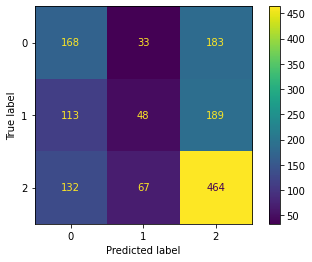

In [44]:
FTR_encoder = LabelEncoder()
y_test = FTR_encoder.fit_transform(y_test);
plot_confusion_matrix(RF_Model, X_test, y_test)